# Les séries temporelles

- Une série temporelle (ou encore une série chronologique) est une suite finie (x1, … , xn) de données indexées par le temps. 
- L'indice temps peut être selon les cas la minute, l'heure, le jour, l'année etc.... 
- Le nombre n est appelé la longueur de la série.


**forecast** :   limite des modèles de Machine Learning classiques
- On s’intéresse à l’évolution au cours du temps d’un phénomène, dans le but de décrire, expliquer puis prévoir ce phénomène dans le futur


**Exemple**

Série airpass : nombre mensuel de passagers aériens, en milliers, de janvier 1949 à décembre 1960.

In [2]:
import pandas as pd
df = pd.read_csv("AirPassengers.csv", index_col="t")
df.head(10)

,Airpass
t,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


<Axes: xlabel='t'>

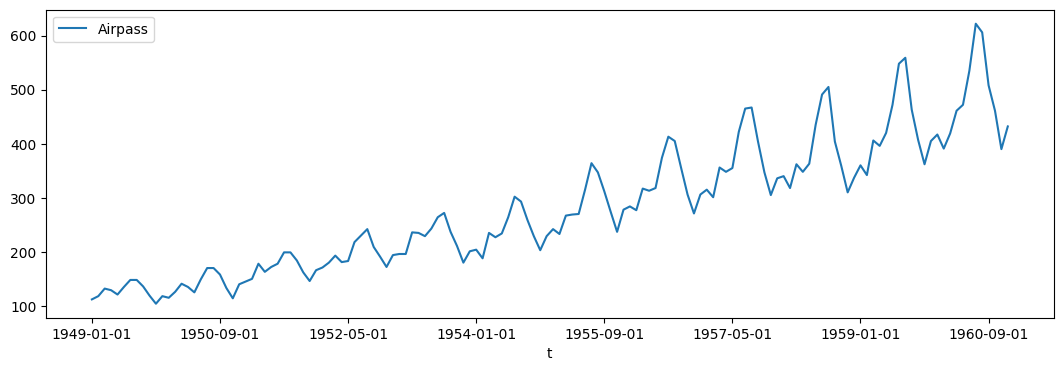

In [3]:
df.plot(y="Airpass", figsize=(13,4))

## Concept de décomposition d'une Série Temporelle


La plupart des séries temporelles peuvent être décomposées en plusieurs composants 

- **La tendance (T)**: représente l'orientation globale ou la progression à long terme des données au fil du temps. Elle témoigne d'une hausse ou d'une baisse générale des valeurs de la série.

 Une tendance peut etre linéaire, polynomiale, logarithmiques, exponentielles etc.
 
 
- **La saisonnalité (S)**: désigne des changements périodiques et récurrents observés dans une période donnée. Ces fluctuations sont influencées par des facteurs saisonniers, qu'ils soient naturels, culturels ou financiers.

 
- **Les résidus (R)** :la partie de la série qui demeure une fois la tendance et la saisonnalité supprimées. Il s'agit de la  variation aléatoire ou les erreurs.
 



### Décomposition Additive
- Utilisée lorsque la variation saisonnière reste constante au fil du temps.
- La série temporelle est modélisée comme la somme de trois composantes :

  
$$
  Y(t) = T(t) + S(t) + R(t)
  $$
  Où :
  - $ Y(t)$ : Série temporelle originale.
  


###  Décomposition Multiplicative
- Utilisée lorsque l'amplitude des variations saisonnières change proportionnellement à la tendance.
- La série temporelle est modélisée comme le produit de trois composantes :


$$
  Y(t) = T(t) \times S(t) \times R(t)
  $$



**Exemple**

<Axes: xlabel='t'>

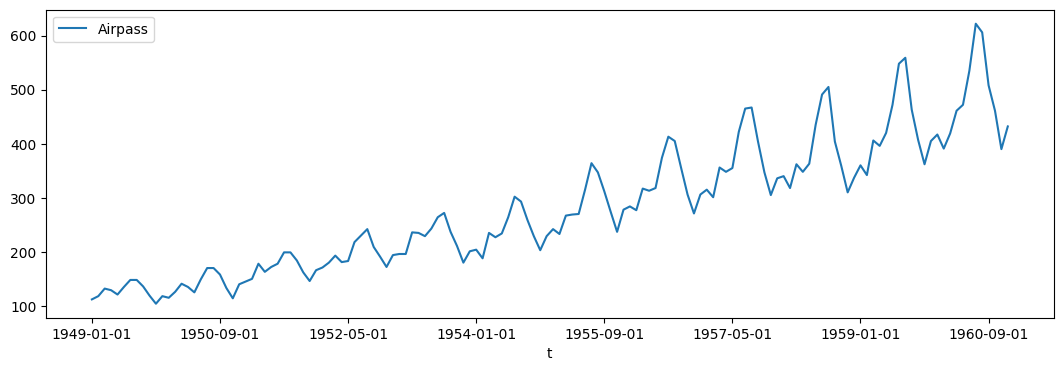

In [4]:
df.plot(y="Airpass", figsize=(13,4))

On utilise la fonction "seasonal_decompose" du package [**statsmodels**](https://www.statsmodels.org/stable/index.html) pour la décomposer de série.

In [5]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('MS')

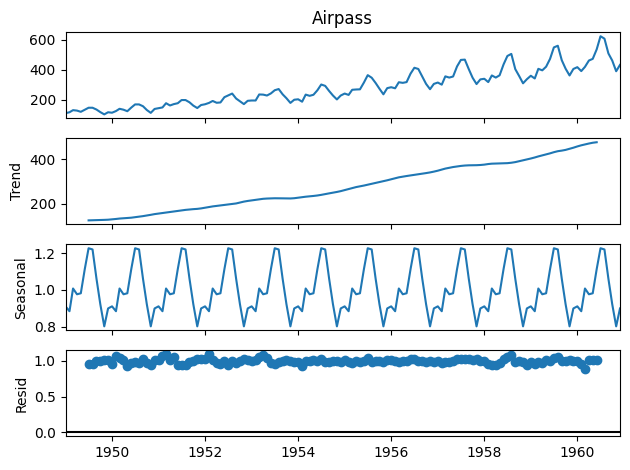

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_mult =seasonal_decompose(df['Airpass'], model='multiplicative')
decomp_mult.plot()
plt.show()

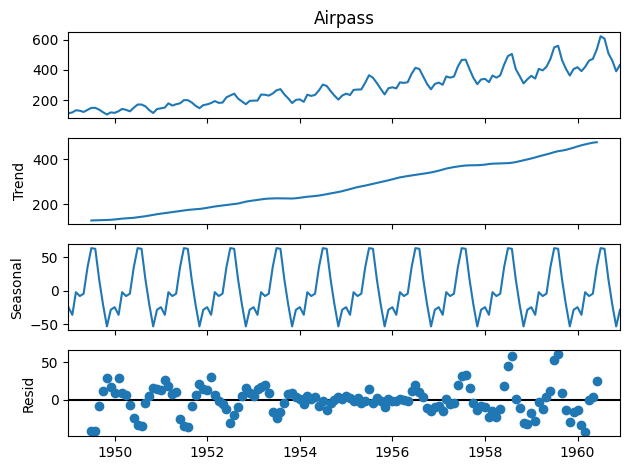

In [7]:
decomp_add = seasonal_decompose(df['Airpass'],  model='additive')
decomp_add.plot()
plt.show()

Text(0.5, 1.0, 'Résidus du modèle multiplicatif')

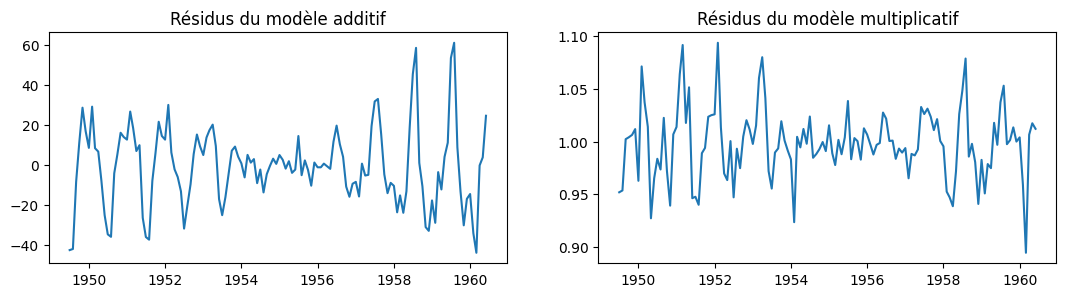

In [8]:
# Plot des résidus
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(decomp_add.resid); ax1.set_title("Résidus du modèle additif")
ax2.plot(decomp_mult.resid); ax2.set_title("Résidus du modèle multiplicatif")

Les résidus multiplicatifs semblent avoir « moins de notion du temps » ➔ mieux


Dans les séries chronologiques, on désigne cela sous le nom de **stationarité**.

## Stationarité

Une série temporelle est stationnaire lorsque ses propriétés statistiques (moyenne, variance, covariance, auto-corélation) ne changent pas au fil du temps. Cela implique que la série ne présente aucune tendance générale, saisonnalité persistante ou autres modifications structurelles.


les séries stationnaires sont généralement plus simples à forecaster que les séries non stationnaires.


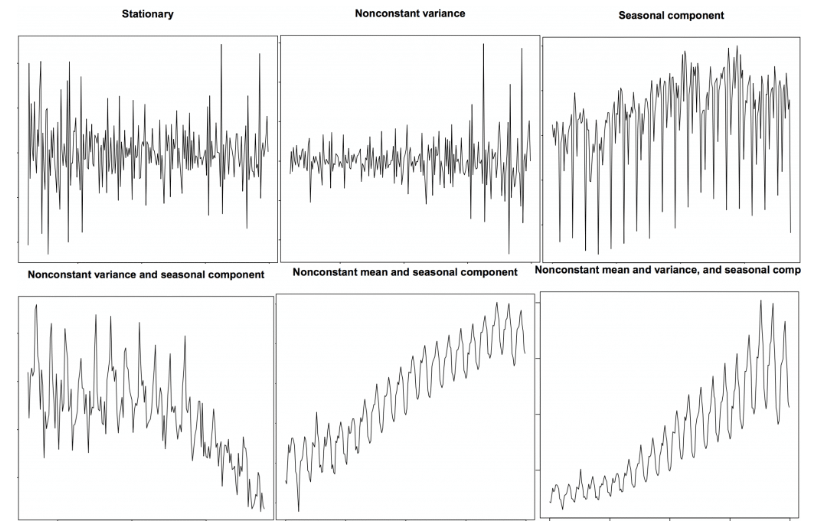

### Test de stationnarité : [ADF-Test](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) (Dickey-Fuller Augmenté)

Le test de Dickey-Fuller est un test statistique qui permet de vérifier si une série est non stationnaire.

Hypothèses du test ADF :

**H0** : La série est non stationnaire.

**H1** : La série est stationnaire.

- Si la `p-value` du test ADF est inférieure à un seuil (généralement 0,05), on peut rejeter l'hypothèse nulle et conclure que la série est stationnaire.

**Exemple**

In [9]:
# La série brut
from statsmodels.tsa.stattools import adfuller
adfuller(df.Airpass)[1]

0.991880243437641

In [10]:
# Résidus du modèle additif
adfuller(decomp_add.resid.dropna())[1]

5.516868902226193e-06

In [11]:
#Résidus du modèle multiplicatif
adfuller(decomp_mult.resid.dropna())[1]

6.93602899259923e-11

### Stationnariser une série temporelle

**1- Différenciation**

La différenciation est la méthode la plus courante pour stationnariser une série. Elle consiste à calculer la différence entre les valeurs successives de la série. Cela permet de retirer les tendances linéaires ou non linéaires.


 
   $$
   Y_t' = Y_t - Y_{t-1}
   $$
   
   Où $ Y_t'$ est la série différenciée et $ Y_t $ la série d'origine.


In [12]:
df_diff = df.Airpass.diff(1)
adfuller(df_diff.dropna())[1] #vérifier la stationnarité avec le -test ADF

0.0542132902838255

In [13]:
df_diff_2 = df_diff.diff(1)
adfuller(df_diff_2.dropna())[1]

2.7328918500142407e-29

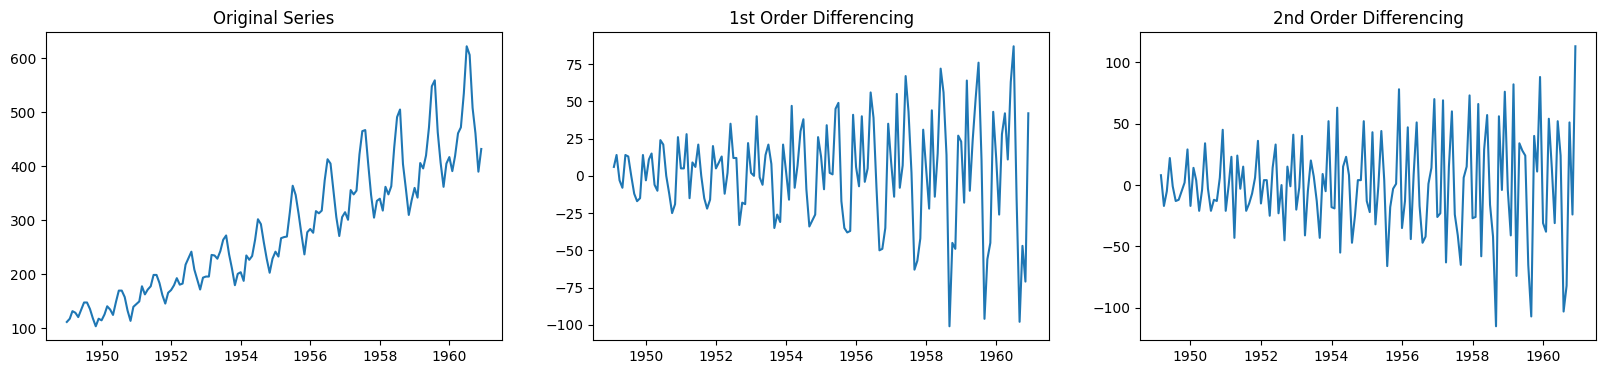

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(df.Airpass); ax1.set_title('Original Series')
ax2.plot(df_diff); ax2.set_title('1st Order Differencing')
ax3.plot(df_diff_2); ax3.set_title('2nd Order Differencing');

**2- Transformation logarithmique**

La transformation logarithmique est utilisée pour stabiliser la variance d'une série temporelle, particulièrement si les variations augmentent proportionnellement avec les valeurs de la série. 



Text(0.5, 1.0, 'Série après transformation logarithmique')

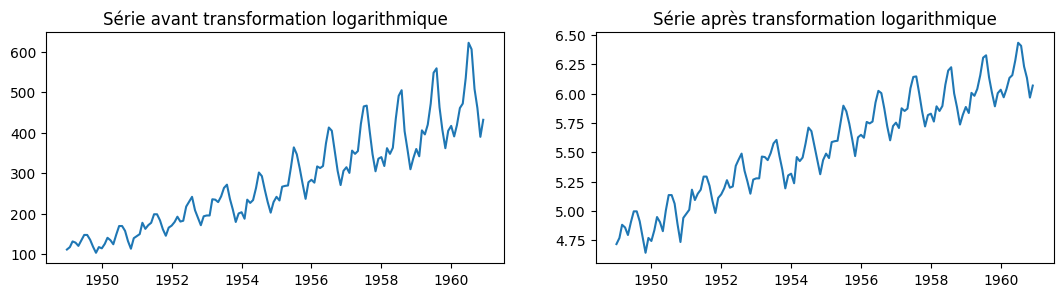

In [15]:
import numpy as np
df_log = np.log(df.Airpass)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(df.Airpass); ax1.set_title("Série avant transformation logarithmique")
ax2.plot(df_log); ax2.set_title("Série après transformation logarithmique")

In [16]:
print(adfuller(df)[1])
print(adfuller(df_log)[1])
print(adfuller(df_log.diff().dropna())[1])

0.991880243437641
0.42236677477039125
0.07112054815085875


**2-Detrending (Suppression de la tendance)**

Le detrending consiste à supprimer la tendance sous-jacente d'une série temporelle pour analyser uniquement les variations à court terme ou les composantes saisonnières. 





Text(0.5, 1.0, 'Série sans la tendance (modèle multiplicatif) )')

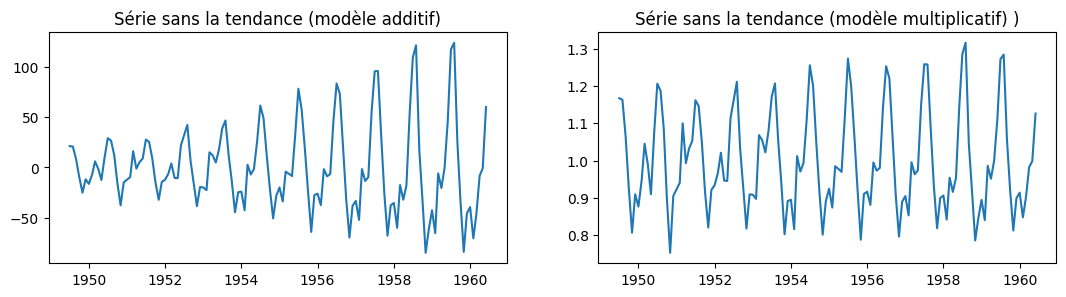

In [17]:
# Suppression de la tendance
df_detrend_add = df['Airpass'] - decomp_add.trend

df_detrend_mul = df['Airpass'] / decomp_mult.trend

f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(df_detrend_add); ax1.set_title("Série sans la tendance (modèle additif)")
ax2.plot(df_detrend_mul); ax2.set_title("Série sans la tendance (modèle multiplicatif) )")


**3- Désaisonnaliser une série temporelle**

La désaisonnalisation consiste à supprimer les effets saisonniers d'une série temporelle pour mieux analyser les tendances sous-jacentes ou les fluctuations non saisonnières

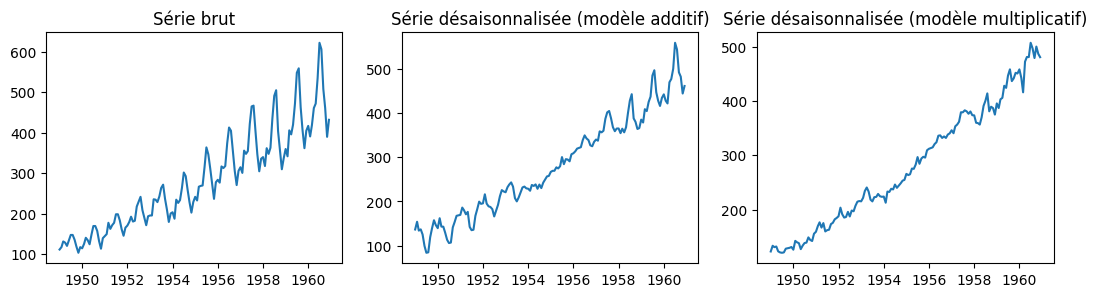

In [18]:
df_deseasonalize_add = df['Airpass'] - decomp_add.seasonal
df_deseasonalize_mul = df['Airpass'] / decomp_mult.seasonal

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 3))
ax1.plot(df.Airpass); ax1.set_title('Série brut')
ax2.plot(df_deseasonalize_add); ax2.set_title("Série désaisonnalisée (modèle additif)")
ax3.plot(df_deseasonalize_mul); ax3.set_title("Série désaisonnalisée (modèle multiplicatif)");


## Concept d'autocorrélation

### [ACF](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

L'autocorrélation permet de mesurer l'impact des observations passées dans une série sur les observations futures. Autrement il  permet d'analyser la dépendance temporelle au sein de la série.


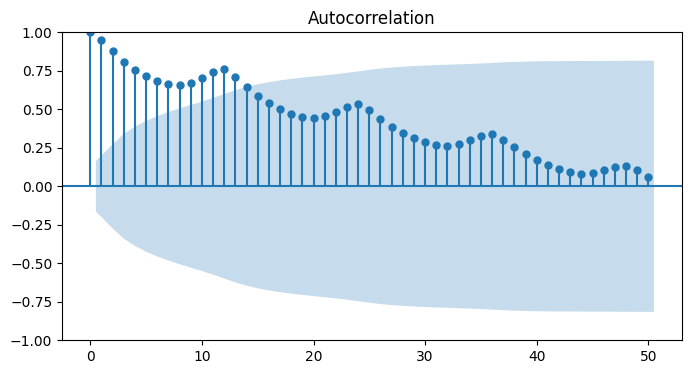

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1,1, figsize=(8,4))
plot_acf(df.Airpass, lags=50, ax=ax)
plt.show()

### [PACF](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html)

L'Autocorrélation Partielle (PACF) est une extension de l'autocorrélation qui mesure la corrélation entre les valeurs d'une série temporelle à différents instants de temps, après avoir éliminé l'effet des valeurs intermédiaires (les lags précédents

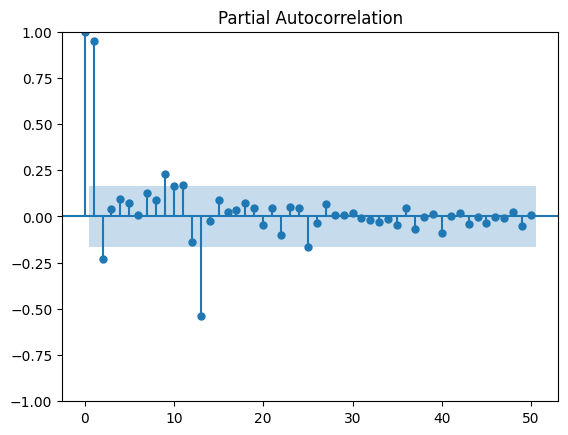

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Airpass, lags=50);

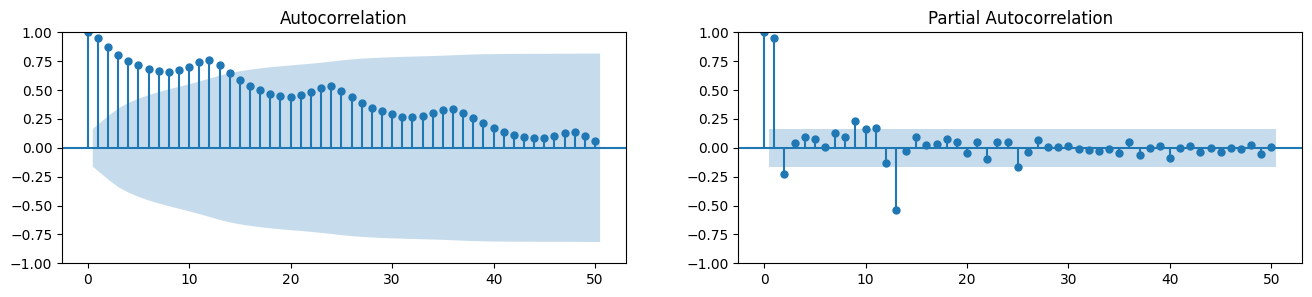

In [21]:
fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(df.Airpass, lags=50, ax=axes[0])
plot_pacf(df.Airpass, lags=50, ax=axes[1]);

# Modélisation des séries temporelles

## ARIMA(p, d, q)

 abréviation de **Auto-Regressive Integrated Moving Average**, est une classe de modèles qui explique une série temporelle donnée en fonction de ses propres valeurs passées, 
 
- **AR (AutoRegressive)** : dépendance entre une observation et les \( p \) valeurs passées.
- **I (Integrated)** : différenciation pour rendre la série stationnaire.
- **MA (Moving Average)** : dépendance entre une observation et les \( q \) erreurs passées.

$$
X_t =\alpha + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ...  + \theta_1 \epsilon_{t} + \theta_2 \epsilon_{t-1}
$$

où :
- $ \phi $ sont les coefficients de la partie AR.
- $ \theta $ sont les coefficients de la partie MA.
- $ \epsilon_t$ est le bruit blanc.

**Exemple de Modèle ARIMA(1,1,2)**
$$
\Delta X_t = \alpha + \phi_1 \Delta X_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}
$$

Avec
- $\Delta X_t = X_t - X_{t-1}$ : série différenciée



### Trouver les paramètres p, d, q

In [22]:
df_diff = df.Airpass.diff(1)
print(adfuller(df_diff.dropna())[1]) #vérifier la stationnarité avec le -test ADF
df_diff_2 = df_diff.diff(1)
print(adfuller(df_diff_2.dropna())[1])

0.0542132902838255
2.7328918500142407e-29


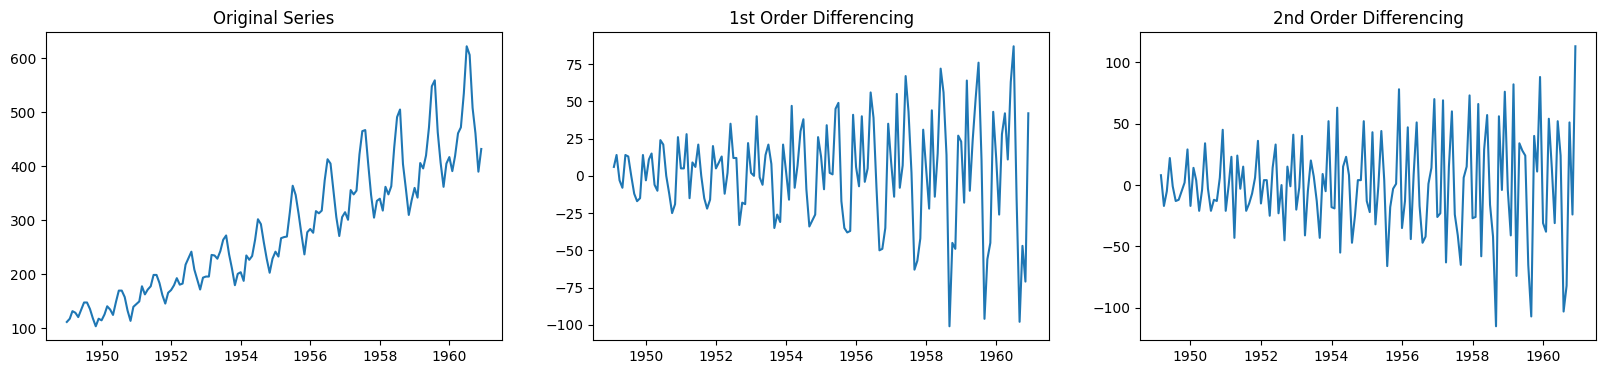

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(df.Airpass); ax1.set_title('Original Series')
ax2.plot(df_diff); ax2.set_title('1st Order Differencing')
ax3.plot(df_diff_2); ax3.set_title('2nd Order Differencing');

---
**On remarque un effet saisonnier après la différenciation. Nous ne pouvons donc pas utiliser ARIMA, mais plutôt SARIMA. Sinon, il faudra désaisonner la série avant d'utiliser ARIMA**


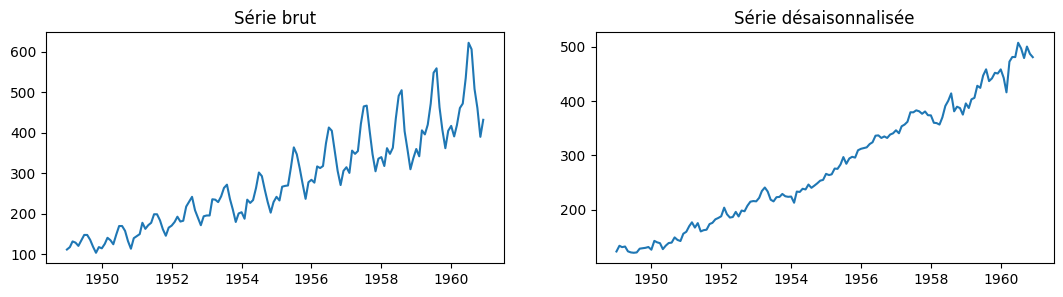

In [24]:
df_deseasonalize = df['Airpass'] / decomp_mult.seasonal

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 3))
ax1.plot(df.Airpass); ax1.set_title('Série brut')
ax2.plot(df_deseasonalize_mul); ax2.set_title("Série désaisonnalisée");


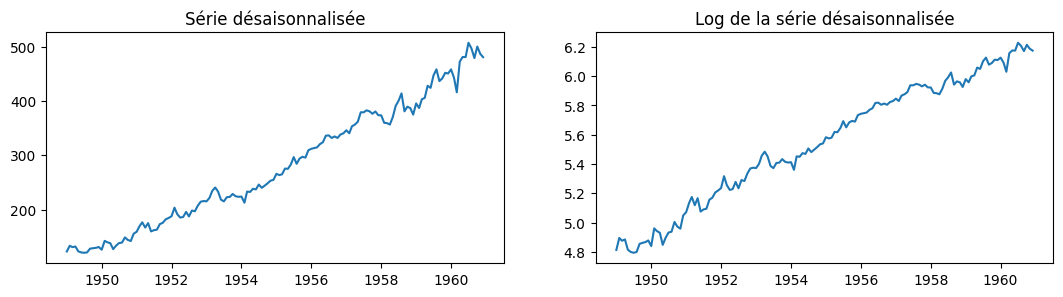

In [32]:
df_linearized =np.log(df_deseasonalize)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 3))
ax1.plot(df_deseasonalize); ax1.set_title("Série désaisonnalisée")
ax2.plot(df_linearized); ax2.set_title('Log de la série désaisonnalisée');


**Regardons à nouveau la différenciation de la série linéarisée**

In [41]:
print(adfuller(df_linearized)[1])

df_linearized_diff = df_linearized.diff(1)
print(adfuller(df_linearized_diff.dropna())[1]) 

df_linearized_diff_2 = df_linearized_diff.diff(1)
print(adfuller(df_linearized_diff_2.dropna())[1])

0.5723101936663938
7.802595500244982e-09
5.800645798797098e-10


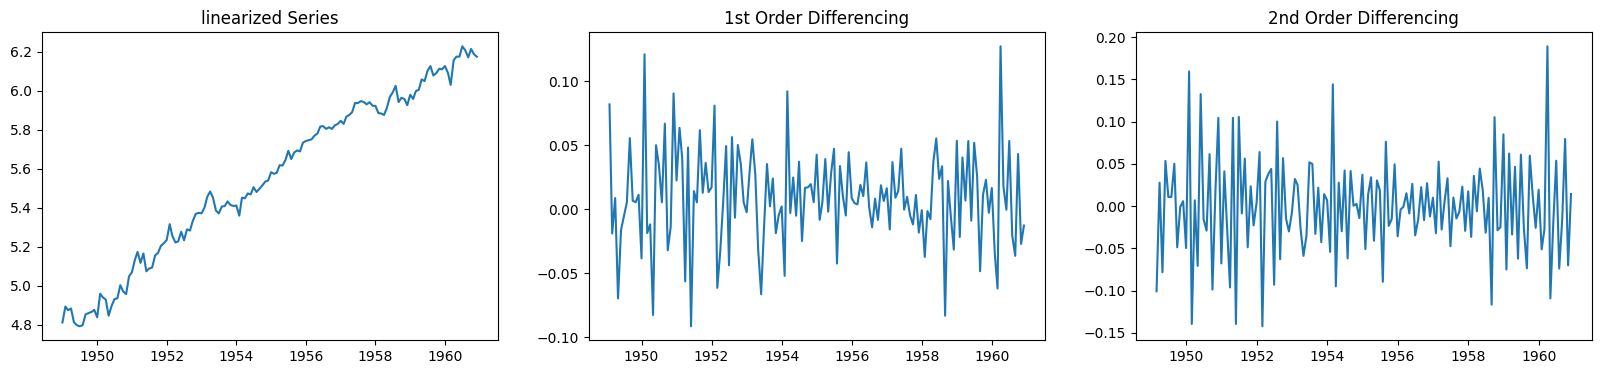

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
ax1.plot(df_linearized); ax1.set_title('linearized Series')
ax2.plot(df_linearized_diff); ax2.set_title('1st Order Differencing')
ax3.plot(df_linearized_diff_2); ax3.set_title('2nd Order Differencing');

In [43]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_deseasonalize)

1

**Donc d= 1**

**Cherchons maintenant 𝑝 et q**


### Méthode de Box-Jenkins

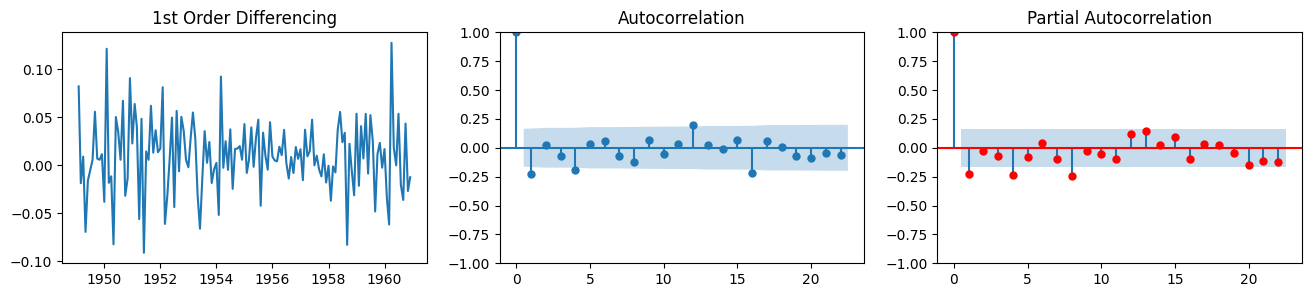

In [30]:
# ACF / PACF 
fig, axes = plt.subplots(1,3, figsize=(16,3))
axes[0].plot(df_linearized_diff); axes[0].set_title('1st Order Differencing')
plot_acf(df_linearized_diff.dropna(), ax=axes[1])
plot_pacf(df_linearized_diff.dropna(), method='ywm',ax=axes[2], c='r');

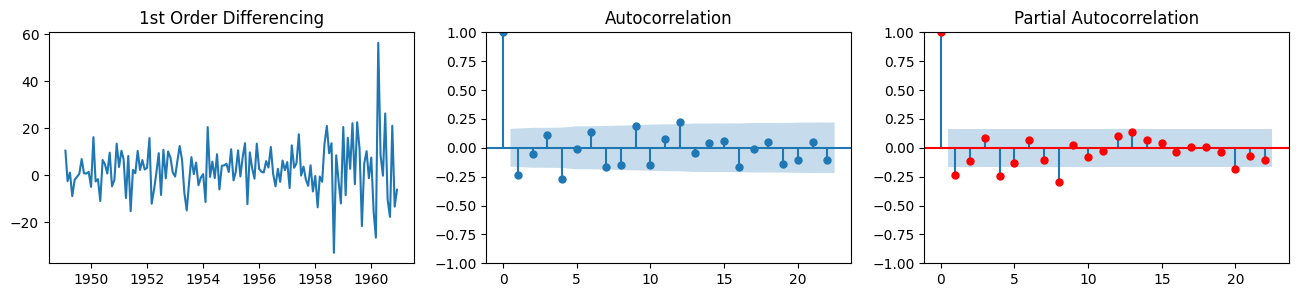

In [45]:
# ACF / PACF
df_deseasonalize_diff= df_deseasonalize.diff(1)
fig, axes = plt.subplots(1,3, figsize=(16,3))
axes[0].plot(df_deseasonalize_diff); axes[0].set_title('1st Order Differencing')
plot_acf(df_deseasonalize_diff.dropna(), ax=axes[1])
plot_pacf(df_deseasonalize_diff.dropna(), method='ywm',ax=axes[2], c='r');

**q = 1 et p = 3**

### GridSearch avec `auto_arima`

In [46]:
import pmdarima as pm
smodel = pm.auto_arima(df_linearized,
                       start_p=1, max_p=3,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=True,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-530.112, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-527.872, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-532.099, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-532.030, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-527.872, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-530.120, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-527.543, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-532.099, Time=0.26 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.822 seconds


In [47]:
smodel = pm.auto_arima(df_deseasonalize,
                       start_p=1, max_p=3,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1075.416, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1084.855, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1078.899, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1077.454, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1084.855, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1077.482, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1077.293, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1078.314, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1078.959, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1075.416, Time=0.44 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 4.177 seconds


### La prédiction avec `forecast()`, `.get_forecast()`

In [49]:
#train = df_linearized[0:110]
#test = df_linearized[110:]

from statsmodels.tsa.arima.model import ARIMA
train = df_deseasonalize[0:110]
test = df_deseasonalize[110:]

arima = ARIMA(train, order=(1, 1, 1), trend='t')  
arima = arima.fit()

## Forecasts
forecast = arima.forecast(len(test), alpha=0.05)  # 95% confidence

forecast_results = arima.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

c:\Users\Jose Fabian Cardona\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [50]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='b')
    plt.plot(test, label='actual', color='b', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

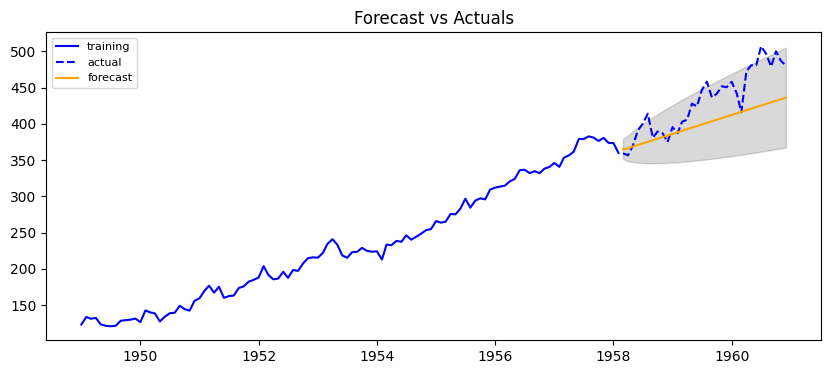

In [51]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

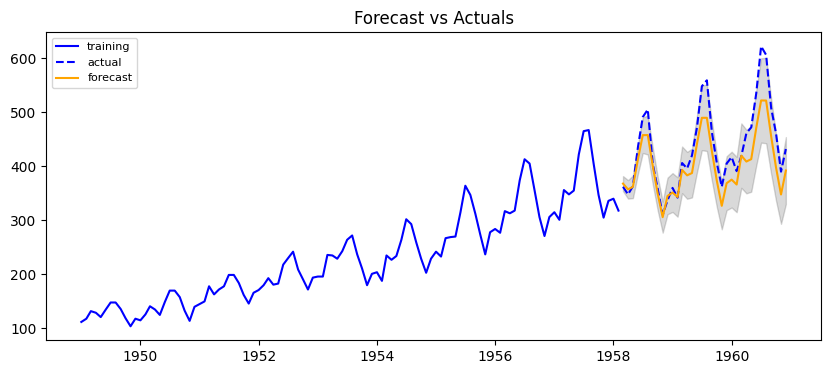

In [128]:
forecast_recons = forecast * decomp_mult.seasonal[110:]
train_recons = train * decomp_mult.seasonal[0:110]
test_recons = test * decomp_mult.seasonal[110:]
lower_recons = confidence_int[:, 0] * decomp_mult.seasonal[110:]
upper_recons = confidence_int[:, 1] * decomp_mult.seasonal[110:]

# Plot
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons.values, upper_recons.values)

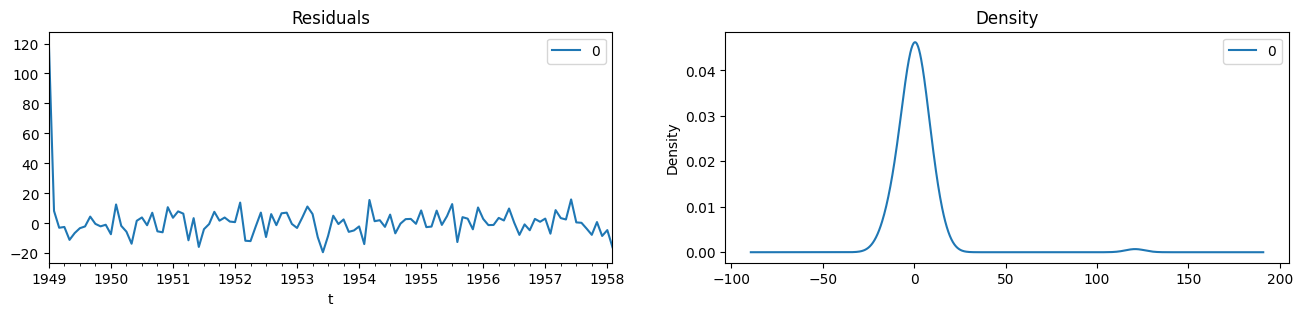

In [129]:
residuals = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);